In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam

# Preprocessing

In [2]:
raw_df = pd.read_csv(r"https://raw.githubusercontent.com/OmdenaAI/KanoNigeriaChapter_SmartFarming/refs/heads/main/Dataset_Merged/KanoState_new.csv")

In [3]:
raw_df.head()

,date,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,SUB_REGION,LGA,LAT,LON
0,2014-01-01,19.85,30.76,10.57,15.35,0.0,1.71,3.28,0.87,58.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
1,2014-01-02,20.26,29.80,12.54,13.38,0.0,2.06,3.51,1.18,60.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2,2014-01-03,20.19,29.34,13.32,15.11,0.0,2.49,4.55,1.33,60.1,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
3,2014-01-04,20.22,29.90,12.63,18.16,0.0,2.47,4.54,1.33,67.7,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
4,2014-01-05,19.88,28.37,12.65,21.71,0.0,2.27,3.93,1.12,69.3,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27


In [4]:
# Check for missing values
raw_df.isnull().sum()

,0
date,0
Temperature_at_2-Meters (C),0
Temperature_at_2_Meters_Maximum (C),0
Temperature-at_2_Meters_Minimum (C),0
Relative_Humidity_at_2_Meters (%),0
Precipitation (mm/day),0
Wind_Speed_at_2_Meters (m/s),0
Wind_Speed_at_2_Meters_Maximum (m/s),0
Wind_Speed_at_2_Meters_Minimum (m/s),0
Wind_Direction_at_2_Meters (Degrees),0


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148666 entries, 0 to 148665
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   date                                  148666 non-null  object 
 1   Temperature_at_2-Meters (C)           148666 non-null  float64
 2   Temperature_at_2_Meters_Maximum (C)   148666 non-null  float64
 3   Temperature-at_2_Meters_Minimum (C)   148666 non-null  float64
 4   Relative_Humidity_at_2_Meters (%)     148666 non-null  float64
 5   Precipitation (mm/day)                148666 non-null  float64
 6   Wind_Speed_at_2_Meters (m/s)          148666 non-null  float64
 7   Wind_Speed_at_2_Meters_Maximum (m/s)  148666 non-null  float64
 8   Wind_Speed_at_2_Meters_Minimum (m/s)  148666 non-null  float64
 9   Wind_Direction_at_2_Meters (Degrees)  148666 non-null  float64
 10  Surface_Soil_Wetness                  148666 non-null  float64
 11  

In [6]:
correlation_df = raw_df.drop(columns = ['date','SUB_REGION', 'LGA'])

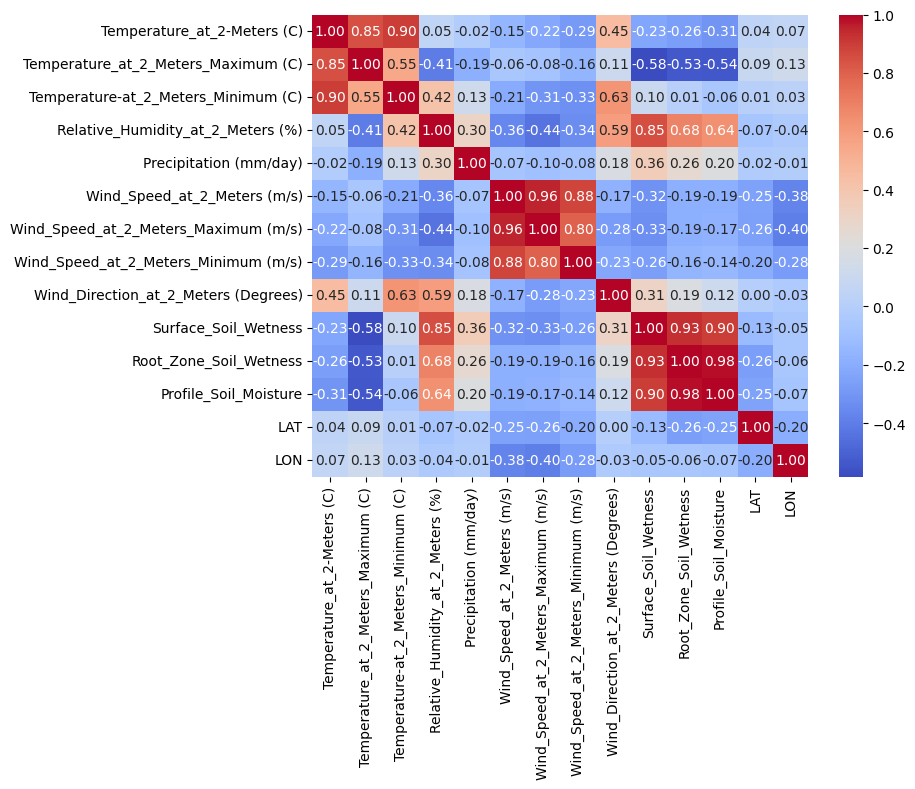

In [7]:
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [8]:
#Use date as index
df = raw_df.set_index('date')
df.head()

,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,SUB_REGION,LGA,LAT,LON
date,,,,,,,,,,,,,,,,
2014-01-01,19.85,30.76,10.57,15.35,0.0,1.71,3.28,0.87,58.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2014-01-02,20.26,29.80,12.54,13.38,0.0,2.06,3.51,1.18,60.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2014-01-03,20.19,29.34,13.32,15.11,0.0,2.49,4.55,1.33,60.1,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2014-01-04,20.22,29.90,12.63,18.16,0.0,2.47,4.54,1.33,67.7,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2014-01-05,19.88,28.37,12.65,21.71,0.0,2.27,3.93,1.12,69.3,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27


In [9]:
#List unique regions
print(df['LGA'].unique())

['Kunchi' 'Bichi' 'Tsanyawa' 'Shanono' 'Gwarzo' 'Karaye' 'Rogo' 'Kabo'
 'Bunkure' 'Kibiye' 'Dawakin_Tofa' 'Rano' 'Tudun_Wada' 'Doguwa' 'Madobi'
 'Kura' 'Garun_Mallam' 'Bebeji' 'Kiru' 'Sumaila' 'Garko' 'Tofa' 'Takai'
 'Albasu' 'Gaya' 'Ajingi' 'Wudil' 'Warawa' 'Dawakin_Kudu' 'Rimin_Gado'
 'Bagwai' 'Gezawa' 'Gabasawa' 'Minjibir' 'Dambatta' 'Makoda' 'Metro']


In [10]:
#Create unique region df
Kunchi_df = df[df['LGA'] == 'Kunchi'].copy()

In [11]:
Kunchi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 2014-01-01 to 2024-12-31
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Temperature_at_2-Meters (C)           4018 non-null   float64
 1   Temperature_at_2_Meters_Maximum (C)   4018 non-null   float64
 2   Temperature-at_2_Meters_Minimum (C)   4018 non-null   float64
 3   Relative_Humidity_at_2_Meters (%)     4018 non-null   float64
 4   Precipitation (mm/day)                4018 non-null   float64
 5   Wind_Speed_at_2_Meters (m/s)          4018 non-null   float64
 6   Wind_Speed_at_2_Meters_Maximum (m/s)  4018 non-null   float64
 7   Wind_Speed_at_2_Meters_Minimum (m/s)  4018 non-null   float64
 8   Wind_Direction_at_2_Meters (Degrees)  4018 non-null   float64
 9   Surface_Soil_Wetness                  4018 non-null   float64
 10  Root_Zone_Soil_Wetness                4018 non-null   float64
 11  Profile

In [12]:
Kunchi_df['Precipitation (mm/day)'].describe()

,Precipitation (mm/day)
count,4018.000000
mean,2.603561
std,9.307583
min,0.000000
25%,0.000000
50%,0.000000
75%,1.170000
max,243.740000


In [13]:
Kunchi_df = Kunchi_df.drop(columns = ['SUB_REGION', 'LGA', 'LAT', 'LON'])

In [14]:
Kunchi_df.head()

,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture
date,,,,,,,,,,,,
2014-01-01,19.85,30.76,10.57,15.35,0.0,1.71,3.28,0.87,58.8,0.14,0.19,0.19
2014-01-02,20.26,29.80,12.54,13.38,0.0,2.06,3.51,1.18,60.8,0.14,0.19,0.19
2014-01-03,20.19,29.34,13.32,15.11,0.0,2.49,4.55,1.33,60.1,0.13,0.19,0.19
2014-01-04,20.22,29.90,12.63,18.16,0.0,2.47,4.54,1.33,67.7,0.13,0.19,0.19
2014-01-05,19.88,28.37,12.65,21.71,0.0,2.27,3.93,1.12,69.3,0.13,0.19,0.19


# LSTM - phase 1

In [15]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Kunchi_df)

# Create sequences
sequence_length = 10
num_features = len(Kunchi_df.columns)

Sequences = []
lables = []

for i in range(len(scaled_data) - sequence_length):
  seq = scaled_data[i:i+sequence_length]
  label = scaled_data[i+sequence_length][4]
  Sequences.append(seq)
  lables.append(label)

sequences = np.array(Sequences)
lables = np.array(lables)

#Train/test split
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = lables[:train_size], lables[train_size:]

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], num_features))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], num_features))

print("Train X Shape", train_x.shape)
print("Train Y Shape", train_y.shape)
print("Test X Shape", test_x.shape)
print("Test Y Shape", test_y.shape)

Train X Shape (3206, 10, 12)
Train Y Shape (3206,)
Test X Shape (802, 10, 12)
Test Y Shape (802,)


In [16]:
# Define the LSTM model function
def create_lstm_model(input_shape):
    model = Sequential()

    # Add the LSTM layer
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model

# Define input shape based on train data
input_shape = (train_x.shape[1], train_x.shape[2])  # (time steps, features)

# Create the model
model = create_lstm_model(input_shape)

# Train the model
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

# Evaluate the model
loss = model.evaluate(test_x, test_y)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(test_x)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0014 - val_loss: 0.0015
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011    
Test Loss: 0.001524405088275671
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [20]:
print(predictions.shape)

(802, 10, 1)


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0014 - val_loss: 0.0014


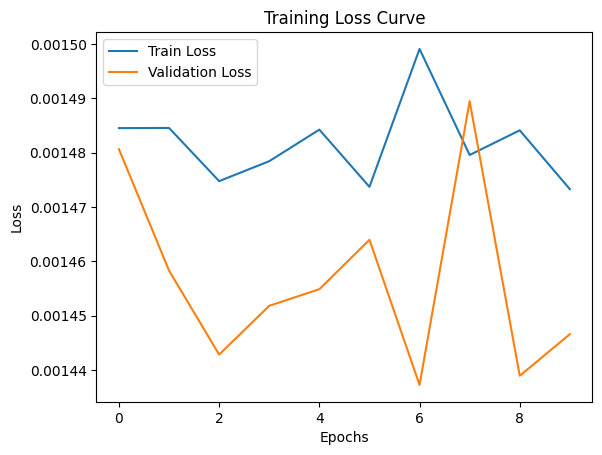

In [23]:
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# LSTM - with precipitation as only input

In [31]:
# Step 1: Data Preparation
Kunchi_df['date'] = pd.to_datetime(Kunchi_df.index)
data = Kunchi_df[['Precipitation (mm/day)']].values

# Step 2: Rolling Window Preparation
def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size, 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Create sequences with a 10-day rolling window
window_size = 10
X, y = create_sequences(data, window_size)

# Reshape X to fit the LSTM input shape [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

#Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)  # Scale input features
y = scaler.fit_transform(y.reshape(-1, 1))  # Scale target (Precipitation)

#Split into Training and Testing Data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#Build the LSTM Model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

#Evaluate the Model
test_loss = model.evaluate(X_test, y_test, verbose=0)

#Predict and Inverse Transform Predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

#Calculate and Print RMSE for Model Performance
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.6139e-04 - val_loss: 0.0013
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.9933e-04 - val_loss: 0.0013
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/

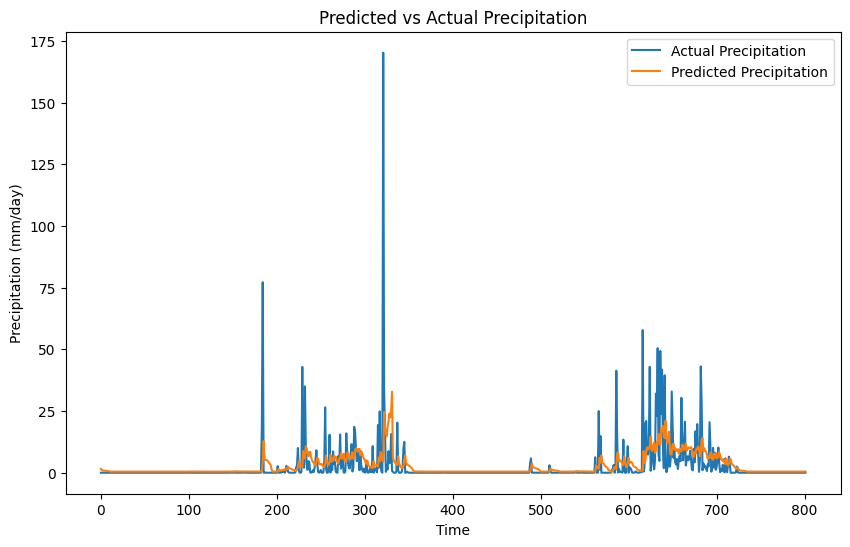

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Precipitation')
plt.plot(y_pred_inv, label='Predicted Precipitation')
plt.title('Predicted vs Actual Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.show()

In [33]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.0838e-04 - val_loss: 0.0013
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.8337e-04 - val_loss: 0.0013
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7973e-04 - val_loss: 0.0013
Epoch 12/50
101/101 ━━━━━━━━━━━━

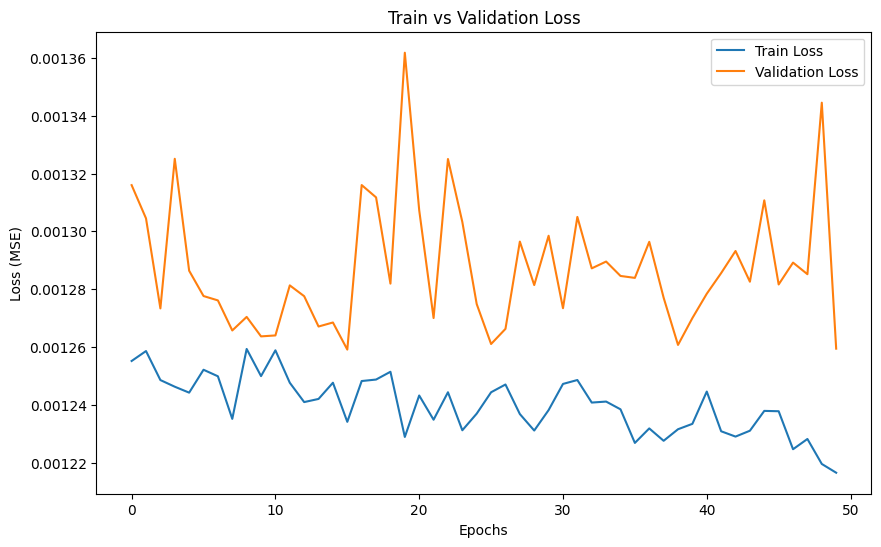

In [34]:
#Plot Training vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Predict and Inverse Transform Predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

#Calculate Performance Metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test_inv, y_pred_inv)
print(f'R-squared (R²): {r2}')

mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Mean Absolute Error (MAE): {mae}')

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 74.82056107435
Root Mean Squared Error (RMSE): 8.649887922646743
R-squared (R²): 0.1286957889153133
Mean Absolute Error (MAE): 2.7356519478485173


The model

# LSTM - with all features as inputs

In [36]:
# Step 1: Load and prepare the dataset
Kunchi_df['date'] = pd.to_datetime(Kunchi_df.index)
data = Kunchi_df[['Temperature_at_2-Meters (C)',
                  'Temperature_at_2_Meters_Maximum (C)',
                  'Temperature-at_2_Meters_Minimum (C)',
                  'Relative_Humidity_at_2_Meters (%)',
                  'Precipitation (mm/day)',
                  'Wind_Speed_at_2_Meters (m/s)',
                  'Wind_Speed_at_2_Meters_Maximum (m/s)',
                  'Wind_Speed_at_2_Meters_Minimum (m/s)',
                  'Wind_Direction_at_2_Meters (Degrees)',
                  'Surface_Soil_Wetness',
                  'Root_Zone_Soil_Wetness',
                  'Profile_Soil_Moisture']].values

# Step 2: Rolling Window Preparation
def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])  # All features for input
        y.append(data[i + window_size, 4])  # Precipitation (index 4) as the target
    return np.array(X), np.array(y)

# Create sequences with a 10-day rolling window
window_size = 10
X, y = create_sequences(data, window_size)

# Reshape X to fit the LSTM input shape [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)  # Scale input features
y = scaler.fit_transform(y.reshape(-1, 1))  # Scale target (Precipitation)

# Split into Training and Testing Data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM Model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Predict and Inverse Transform Predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate and Print RMSE for Model Performance
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE: {rmse}')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2810e-04 - val_loss: 0.0013
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.0491e-04 - val_loss: 0.0013
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.0667e-04 - val_loss: 0.0013
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13m

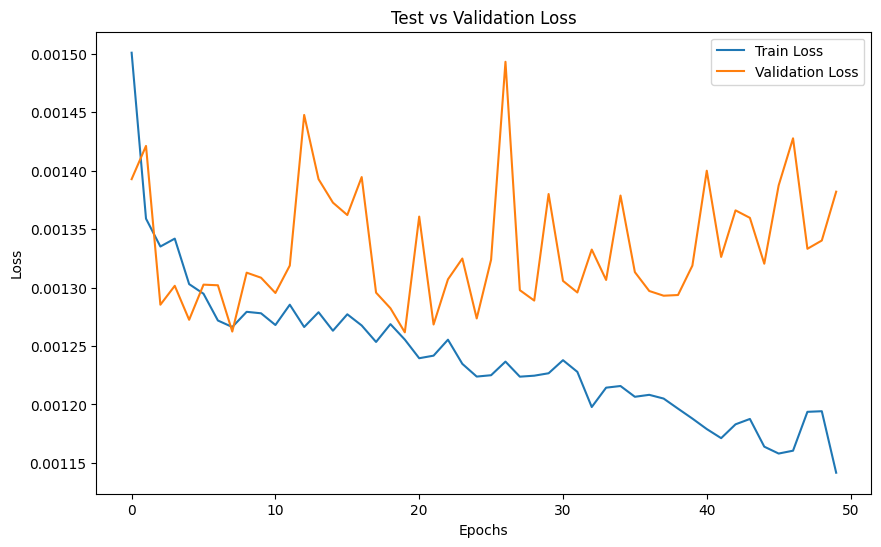

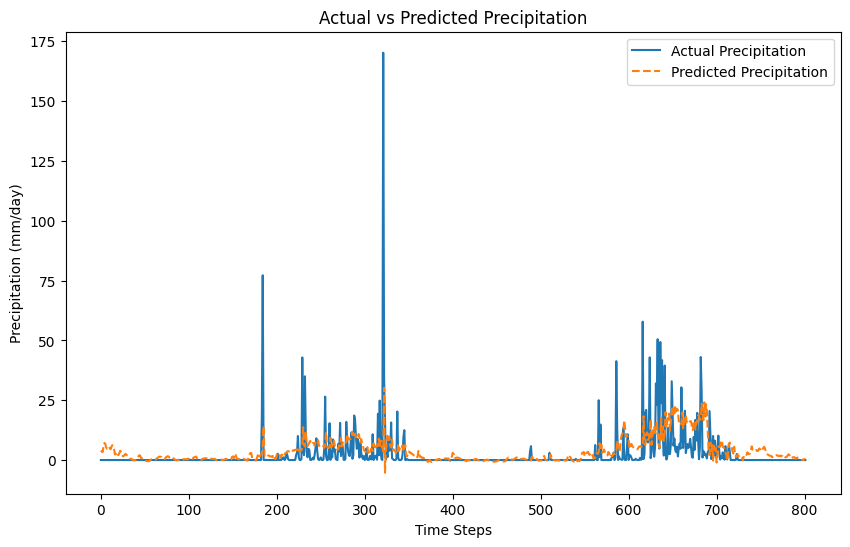

RMSE: 9.061462618415606
R²: 0.04380722298202033


In [37]:
#Plot Test vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Test vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Predict and plot Actual vs Predicted Precipitation
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Precipitation')
plt.plot(y_pred_inv, label='Predicted Precipitation', linestyle='--')
plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Time Steps')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.show()

#Calculate and print performance metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")